# EDA, Data Visualization & Machine Learning on Car Prices in Poland 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier

In [3]:
df = pd.read_csv('Car_Prices_Poland_Kaggle.csv')

## Data Exploration 

In [4]:
df

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...,...,...
117922,117922,volvo,xc-90,gen-ii-2014-xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,117923,volvo,xc-90,gen-ii-2014-xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,117924,volvo,xc-90,gen-ii-2014-xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,117925,volvo,xc-90,gen-ii-2014-xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


In [5]:
df.shape

(117927, 11)

In [6]:
df.describe()

,Unnamed: 0,year,mileage,vol_engine,price
count,117927.000000,117927.000000,1.179270e+05,117927.000000,1.179270e+05
mean,58963.000000,2012.925259,1.409768e+05,1812.057782,7.029988e+04
std,34042.736935,5.690135,9.236936e+04,643.613438,8.482458e+04
min,0.000000,1945.000000,0.000000e+00,0.000000,5.000000e+02
25%,29481.500000,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,58963.000000,2013.000000,1.462690e+05,1796.000000,4.190000e+04
75%,88444.500000,2018.000000,2.030000e+05,1995.000000,8.360000e+04
max,117926.000000,2022.000000,2.800000e+06,7600.000000,2.399900e+06


In [7]:
df.dtypes

Unnamed: 0          int64
mark               object
model              object
generation_name    object
year                int64
mileage             int64
vol_engine          int64
fuel               object
city               object
province           object
price               int64
dtype: object

In [8]:
df.columns

Index(['Unnamed: 0', 'mark', 'model', 'generation_name', 'year', 'mileage',
       'vol_engine', 'fuel', 'city', 'province', 'price'],
      dtype='object')

## Data Cleaning

### Drop Unnecessary Columns

In [9]:
df = df.drop(columns = ['Unnamed: 0','generation_name'])
df

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...
117922,volvo,xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,volvo,xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,volvo,xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,volvo,xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


### Check For NaN Values

In [10]:
df.isna().sum()

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

### Check & Revome  Duplicates

In [11]:
df.duplicated().sum()

6761

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

### Count for Unique Values for Cars

In [14]:
df['mark'].value_counts()

audi             10873
bmw              10729
volkswagen       10468
opel             10014
ford              9375
renault           6789
mercedes-benz     6782
skoda             5722
peugeot           4981
toyota            4976
hyundai           3912
kia               3558
volvo             3340
nissan            3051
mazda             2808
seat              2797
fiat              2773
citroen           2712
honda             2062
mini              1076
mitsubishi        1076
alfa-romeo         686
chevrolet          606
Name: mark, dtype: int64

### Count for Unique Values for Fuel Types

In [15]:
df['fuel'].value_counts()

Gasoline    58145
Diesel      45848
LPG          4097
Hybrid       2281
Electric      753
CNG            42
Name: fuel, dtype: int64

### Mean Prices by Mark

In [16]:
df.groupby('mark')['price'].mean().sort_values(ascending = False)

mark
mercedes-benz    135598.585963
bmw              121183.286793
audi             105392.749011
volvo             92472.250599
mini              71536.833643
alfa-romeo        65794.752187
volkswagen        61870.866546
skoda             61279.840091
kia               58181.175942
mazda             56388.569801
toyota            53973.644494
hyundai           53521.120143
ford              50741.506560
nissan            49266.230416
mitsubishi        48950.999071
honda             47623.768671
peugeot           46305.361976
renault           44726.374577
chevrolet         40359.453795
seat              39505.400787
fiat              38196.479986
opel              36367.216597
citroen           33999.633850
Name: price, dtype: float64

### Sort the DataFrame by Price Values

In [17]:
df = df.sort_values(by = 'price', ascending = False).reset_index(drop=True)

## Data Visualization

### Plot a Correlation Heatmap

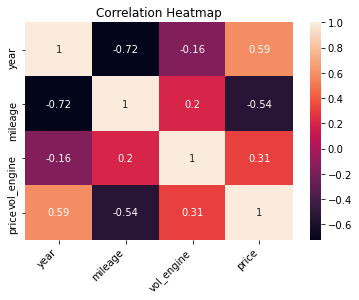

In [18]:
sns.heatmap(df.corr(), annot = True)

plt.rcParams['figure.figsize'] = (22, 14)

plt.xticks(rotation=45, horizontalalignment='right')

plt.title('Correlation Heatmap')

plt.show()

There's a reasonably strong inverse relationship betwwen mileage and year! 

### Distribution of Car Years

In [19]:
mean = df['year'].mean()
mean

2012.8836064983898

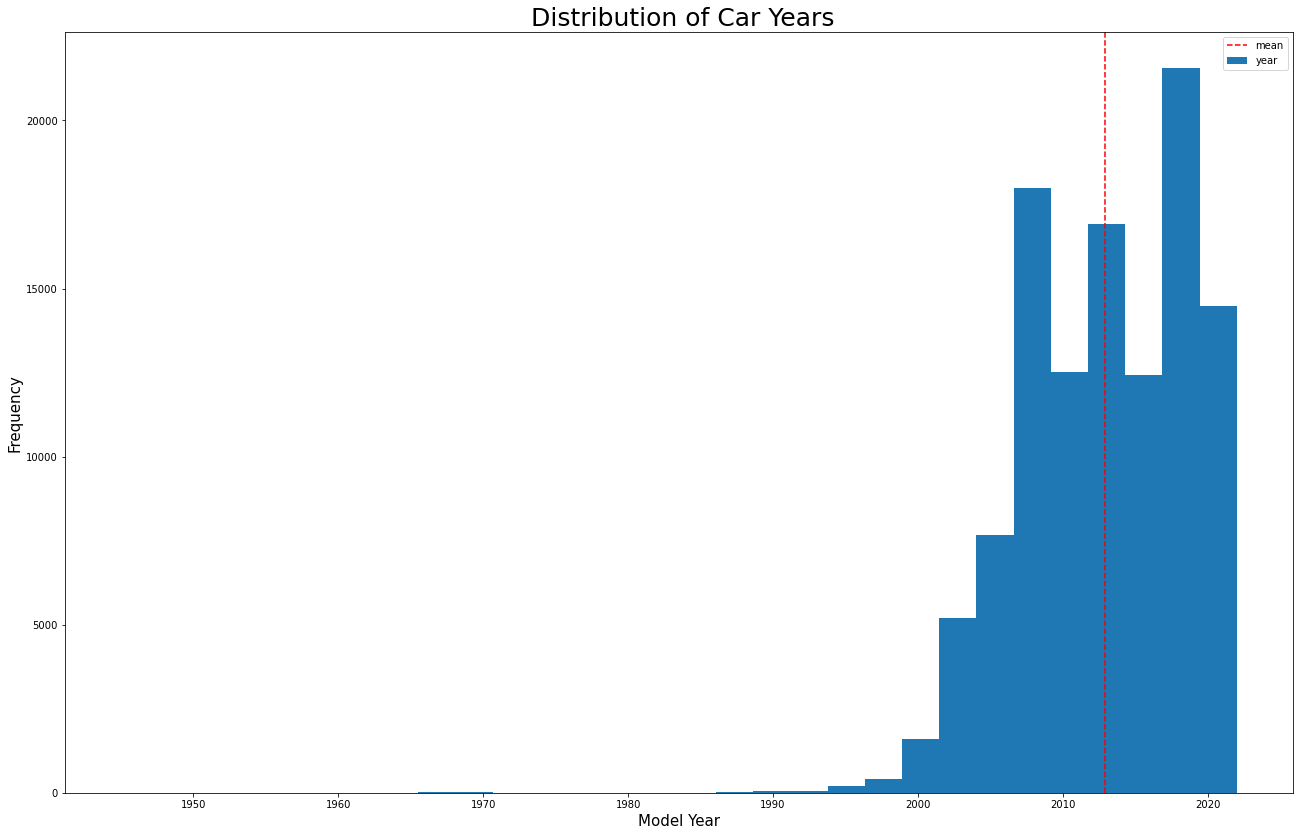

In [20]:
df['year'].plot.hist(bins=30)

#Plot the mean 
plt.axvline(x=mean, color='r', linestyle = '--', label = 'mean')

#plot legend
plt.legend(bbox_to_anchor=(1,1))

#plot axis-name & chart title
plt.xlabel('Model Year', fontsize=15)

plt.ylabel('Frequency', fontsize = 15)

plt.title(' Distribution of Car Years', fontsize=25)

plt.show()


### Scatter Plot of Milleage and Price

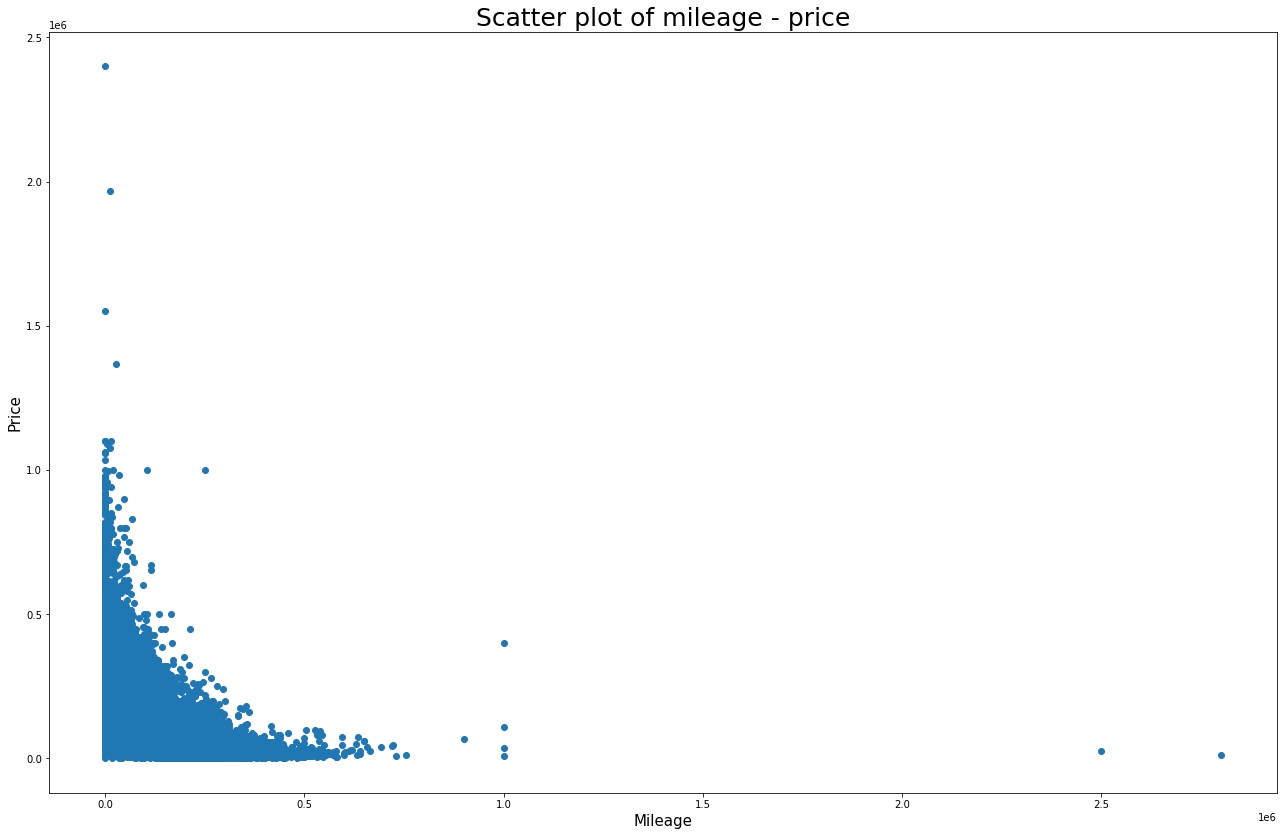

In [61]:
plt.scatter(df['mileage'], df['price'], alpha = 1)
plt.xlabel('Mileage', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Scatter plot of mileage - price', fontsize = 25)
plt.show()

The Scatter plot illustrates that as the mileage decreases, the price increases!

### Average Price by Mark

In [22]:
mean_price_by_mark =  df.groupby('mark')['price'].mean().sort_values(ascending = False)
mean_price_by_mark

mark
mercedes-benz    135598.585963
bmw              121183.286793
audi             105392.749011
volvo             92472.250599
mini              71536.833643
alfa-romeo        65794.752187
volkswagen        61870.866546
skoda             61279.840091
kia               58181.175942
mazda             56388.569801
toyota            53973.644494
hyundai           53521.120143
ford              50741.506560
nissan            49266.230416
mitsubishi        48950.999071
honda             47623.768671
peugeot           46305.361976
renault           44726.374577
chevrolet         40359.453795
seat              39505.400787
fiat              38196.479986
opel              36367.216597
citroen           33999.633850
Name: price, dtype: float64

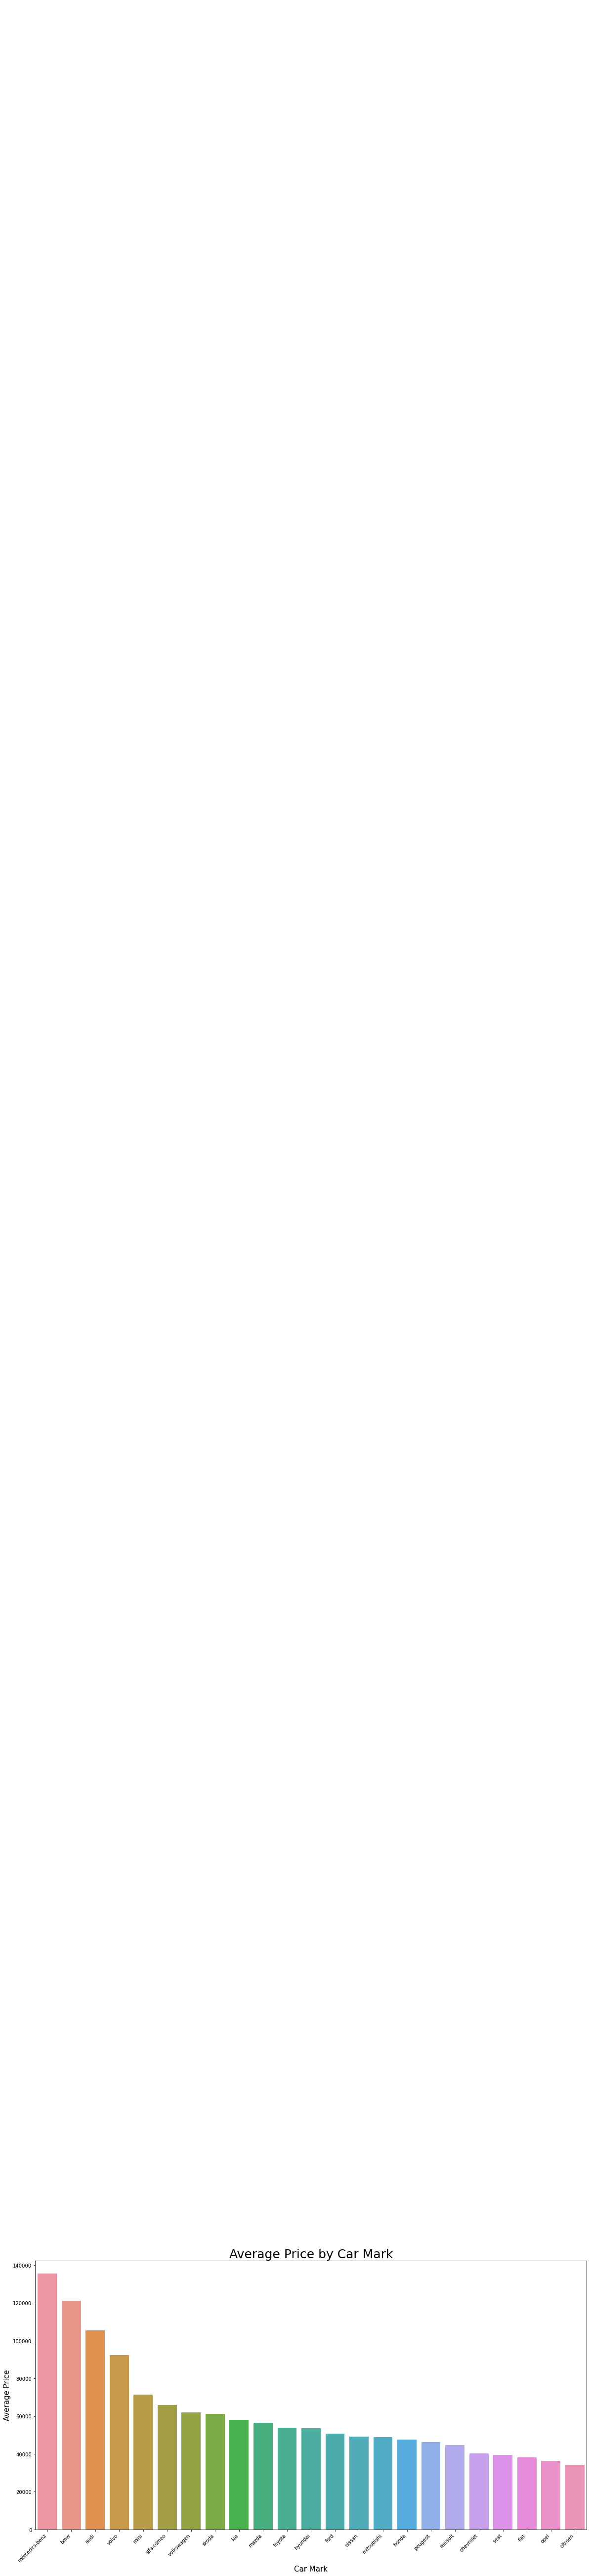

In [78]:
plt.figure(figsize = (20, 10))
p = sns.barplot( x= mean_price_by_mark.index, y= mean_price_by_mark.sort_values(ascending = False))

for b in p.patches:
    p.annotate(str(round(b.get_height() / 1e2, 1)) + 'M',
    (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6),
    ha='center', va='top', rotation='45',
    xytext=(0, 12),  # Adjusted to move the labels above the bars
    textcoords='offset points')


plt.xlabel('Car Mark' , fontsize = 15)

plt.xticks(rotation=45, horizontalalignment='right')


plt.ylabel('Average Price', fontsize = 15)



plt.title('Average Price by Car Mark', fontsize = 25)

plt.show()

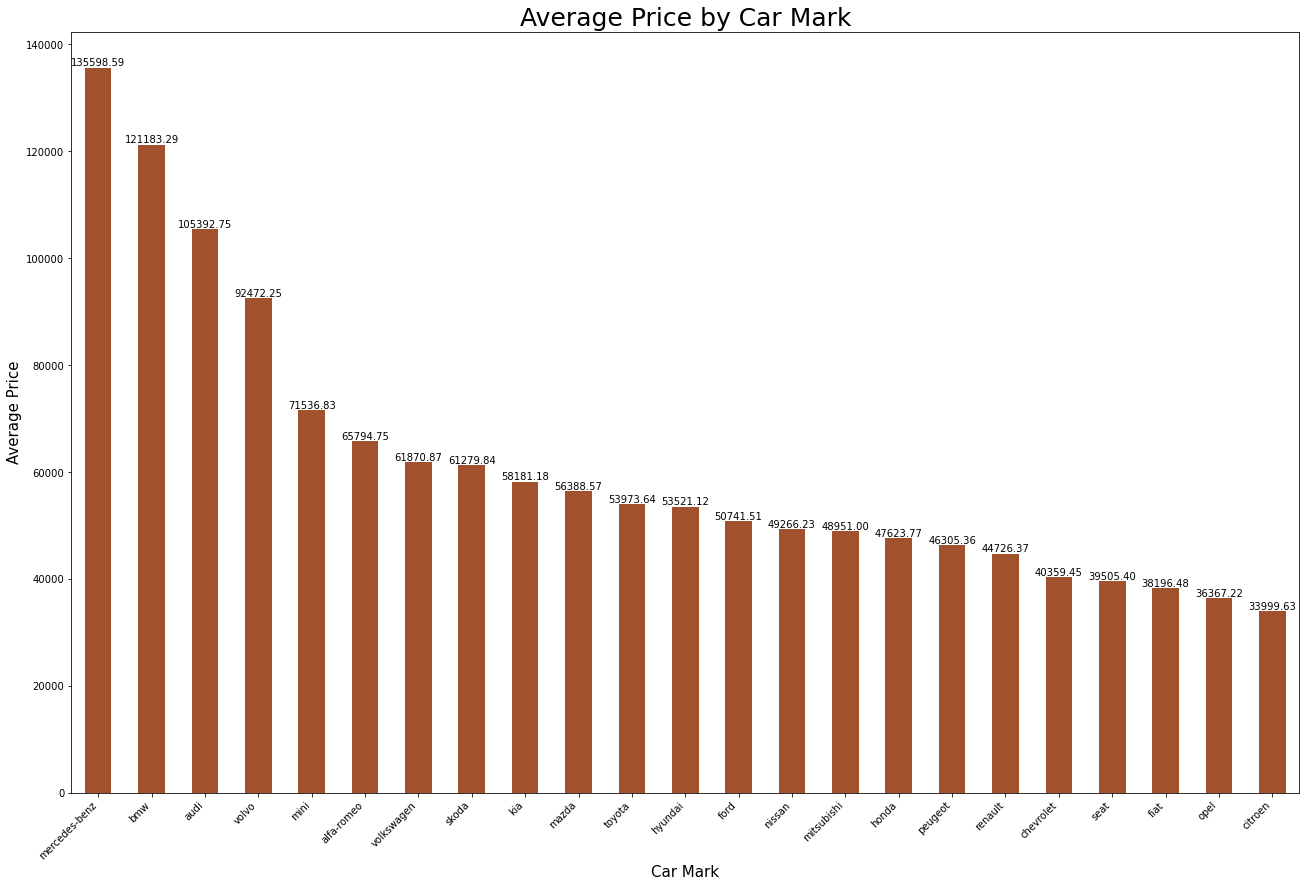

In [89]:
ax = mean_price_by_mark.plot(kind = 'bar', color = 'sienna')

plt.xlabel('Car Mark', fontsize = 15)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Average Price', fontsize = 15)
plt.title('Average Price by Car Mark', fontsize = 25)


#Add the count numbers on top of the bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height + 0.1, f'{height:.2f}', ha='center', va='bottom', rotation='0')


    
plt.show()

### Boxplot of Car Prices

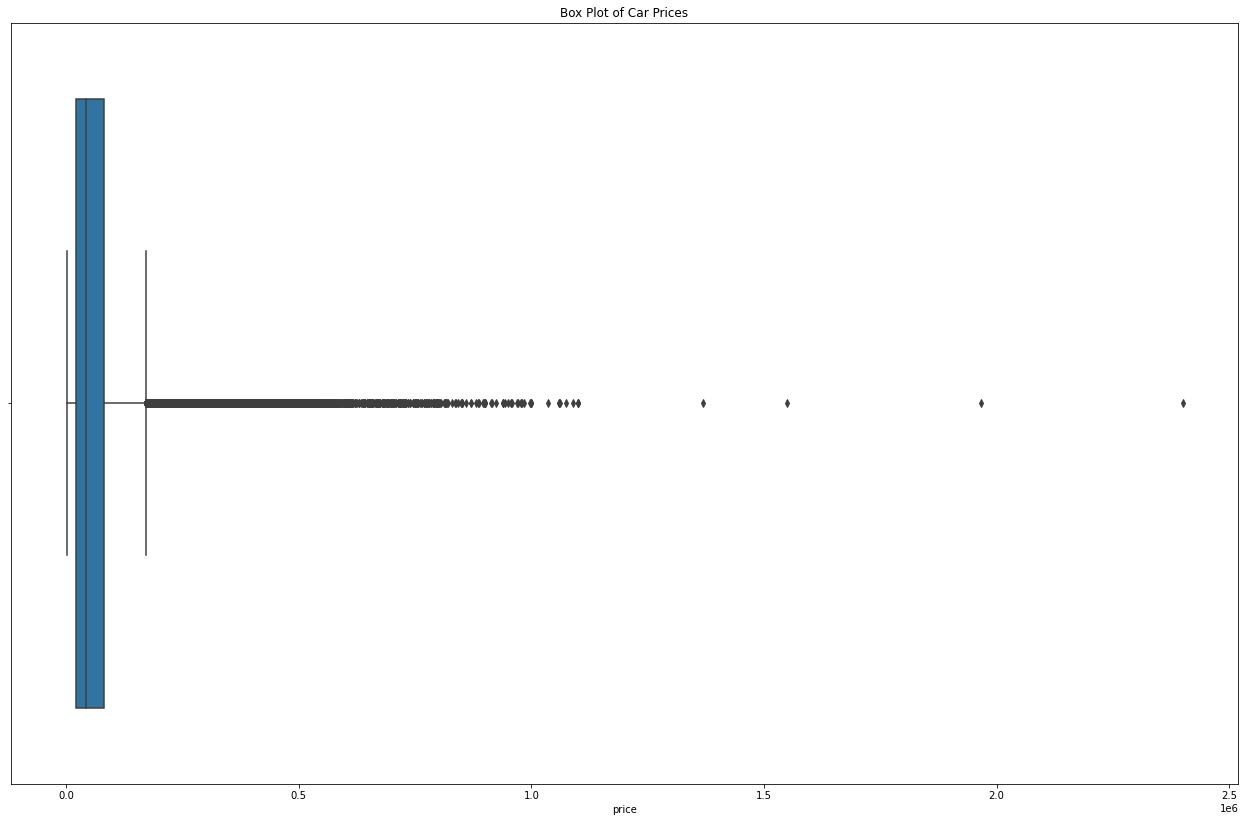

In [24]:
sns.boxplot(x = 'price', data = df)
plt.title('Box Plot of Car Prices', fontsize = 25)
plt.xlabel('Price', fontsize = 15)
plt.show()

The boxplot shows a few outliers in price range. we will use another form of boxplot to identify where the upper 3rd quartile ends.

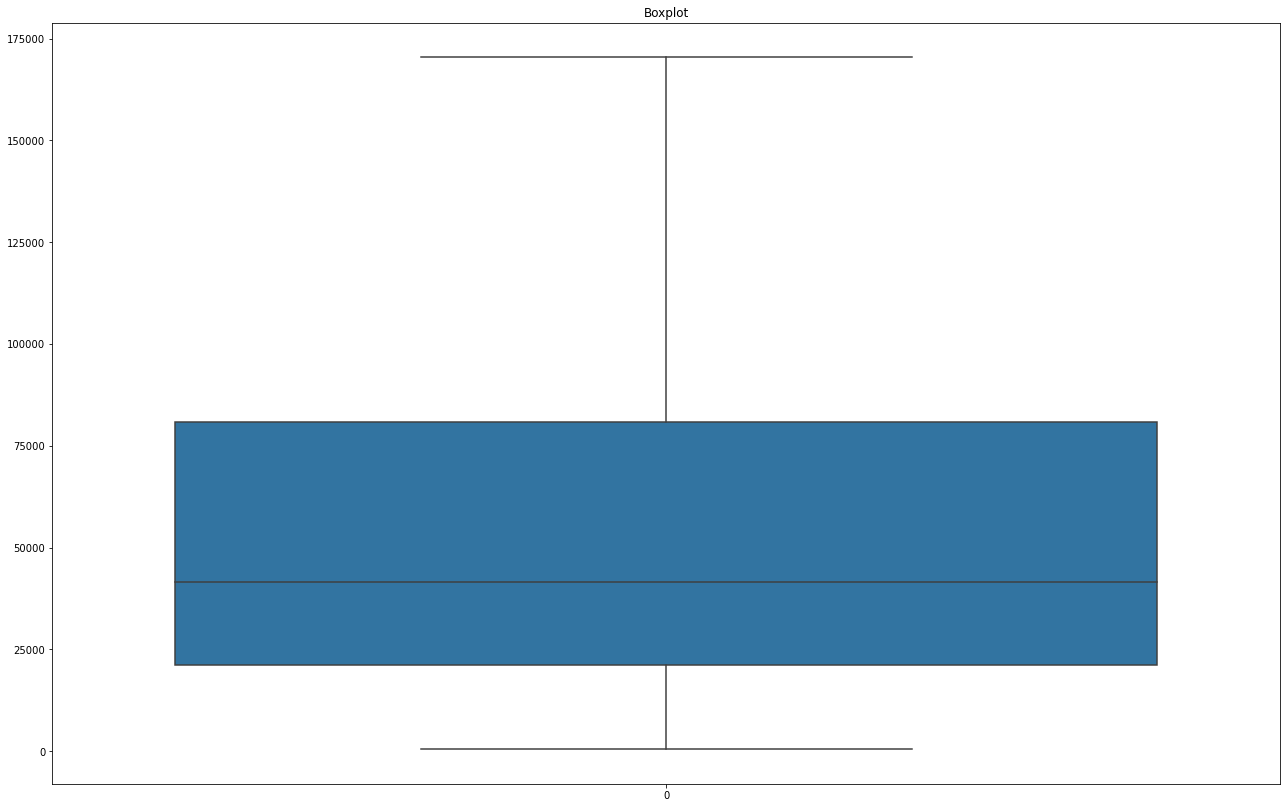

In [25]:
g = sns.boxplot(data=df['price'],
showfliers=False
);
g.set_title('Boxplot');

It looks like the 3rd quartile at the price of around €8,000

### Top 10 Most Common Car Models

In [26]:
Top_10_models = df['model'].value_counts().head(10)
Top_10_models

astra      3184
seria-3    2912
a4         2893
golf       2511
seria-5    2424
a6         2410
focus      2126
octavia    1996
passat     1977
mondeo     1845
Name: model, dtype: int64

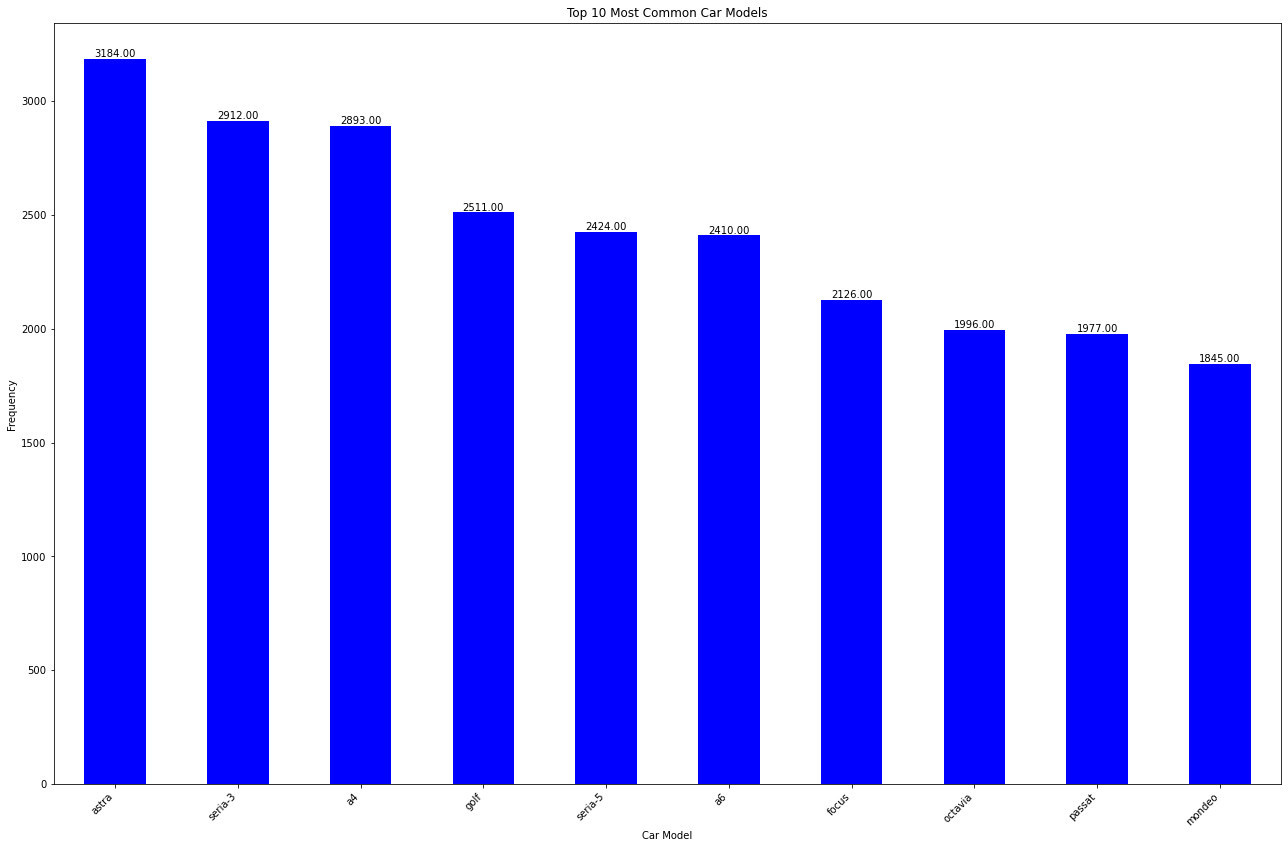

In [90]:
ax = Top_10_models.plot(kind = 'bar', color = 'b')

plt.xlabel('Car Model')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Car Models')


#Add the count numbers on top of the bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height + 0.1, f'{height:.2f}', ha='center', va='bottom', rotation='0')


    
plt.show()

### Scatter Plot of Engine Size and Price

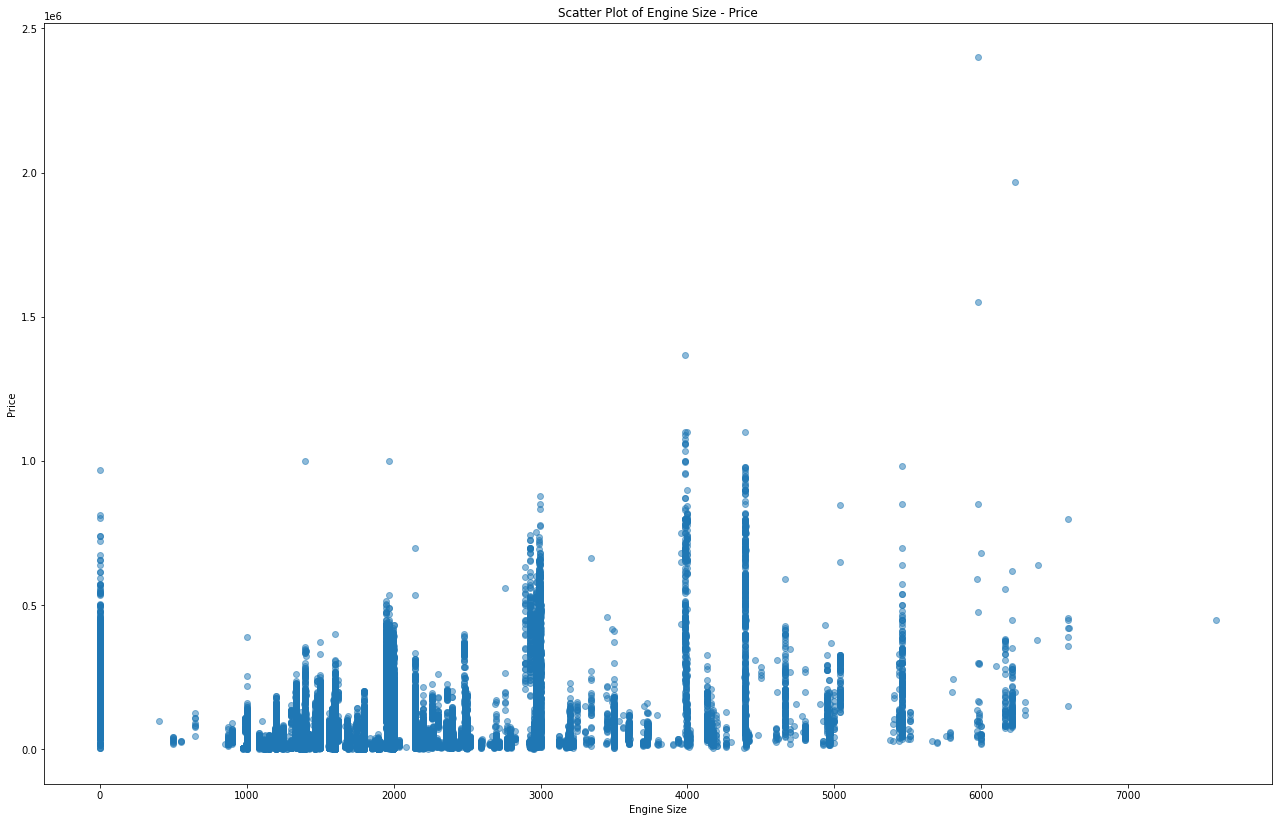

In [28]:
plt.scatter(df['vol_engine'], df['price'], alpha = 0.5)
plt.xlabel('Engine Size', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Scatter Plot of Engine Size - Price', fontsize = 25)
plt.show()

### Count of Cars in Each City

In [29]:
city_counts = df['city'].value_counts().sort_values(ascending = False).head(10)
city_counts

Warszawa    7459
Łódź        3084
Kraków      2730
Wrocław     2569
Poznań      2236
Gdańsk      2165
Katowice    2068
Lublin      1721
Radom       1507
Szczecin    1372
Name: city, dtype: int64

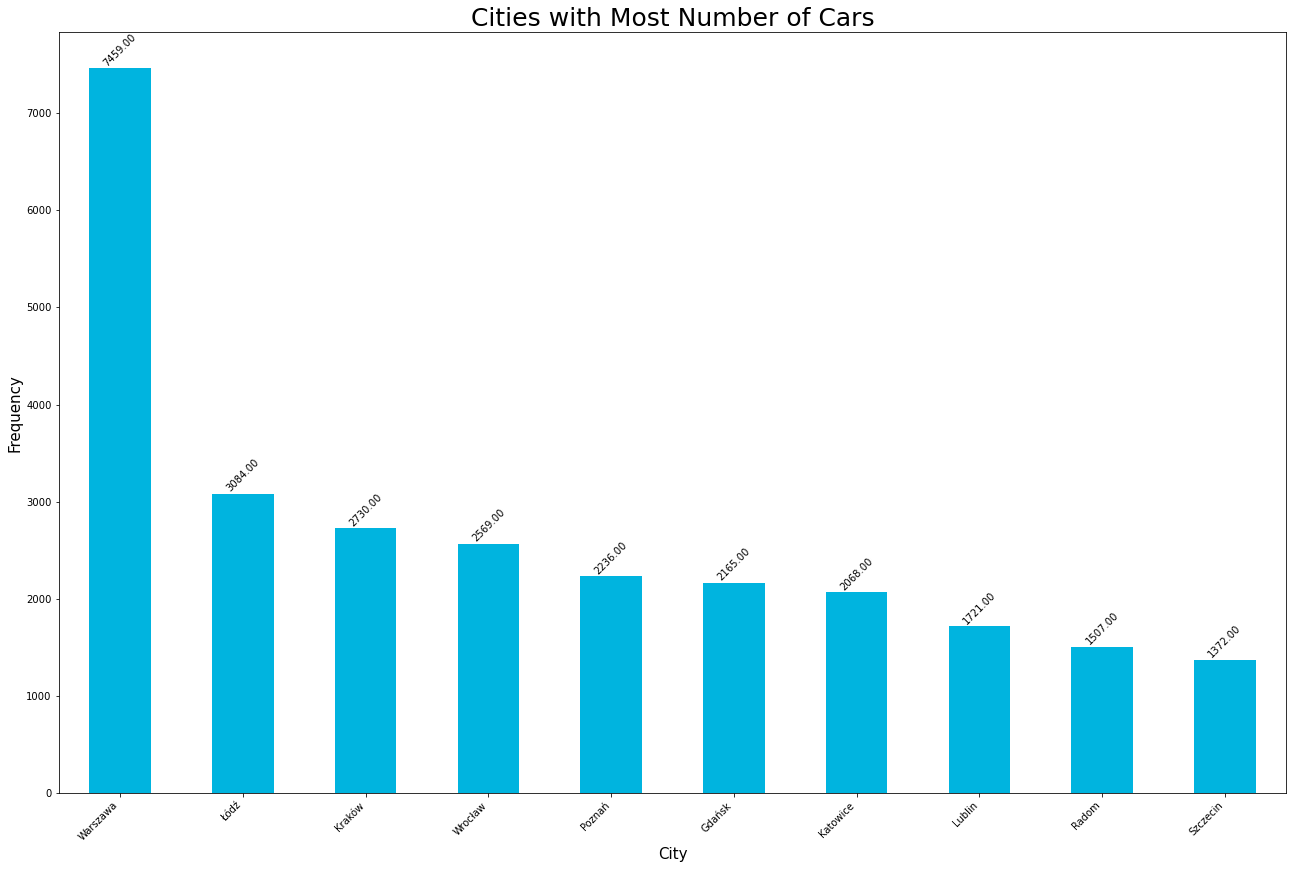

In [72]:
ax = city_counts.plot(kind = 'bar', color = '#00B4DF')

plt.xlabel('City', fontsize = 15)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Frequency', fontsize = 15)
plt.title('Cities with Most Number of Cars', fontsize = 25)


#Add the count numbers on top of the bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height + 0.1, f'{height:.2f}', ha='center', va='bottom', rotation='45')


    
plt.show()

### Max Engine Size by Fuel Type

In [31]:
Max_engine_by_fuel_type = df.groupby('fuel')['vol_engine'].max()
Max_engine_by_fuel_type

fuel
CNG         2034
Diesel      4921
Electric    1580
Gasoline    7600
Hybrid      4395
LPG         6208
Name: vol_engine, dtype: int64

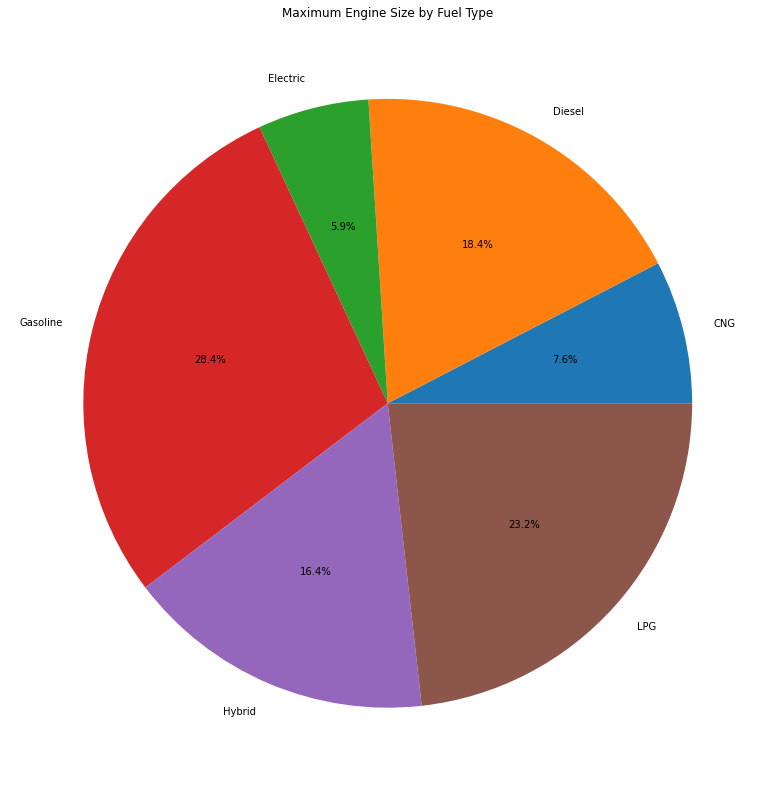

In [73]:
ax = Max_engine_by_fuel_type.plot(kind='pie', autopct='%1.1f%%')

plt.title('Maximum Engine Size by Fuel Type')
plt.ylabel('')

plt.show()

## Feature Engineering

In [33]:
df

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,mercedes-benz,s-klasa,2017,400,5980,Gasoline,Janki,Mazowieckie,2399900
1,mercedes-benz,s-klasa,2019,12000,6233,Gasoline,Poznań,Wielkopolskie,1966770
2,mercedes-benz,s-klasa,2018,21,5980,Gasoline,Warszawa,Mazowieckie,1550000
3,mercedes-benz,amg-gt,2019,28500,3982,Gasoline,Poznań,Wielkopolskie,1368341
4,mercedes-benz,amg-gt,2020,16000,3982,Gasoline,Pruszcz Gdański,Pomorskie,1100000
...,...,...,...,...,...,...,...,...,...
111161,volkswagen,passat,1998,220000,1781,Gasoline,Pniewy,Wielkopolskie,1250
111162,volkswagen,golf,1999,190321,1390,Gasoline,Tarnowskie Góry,Śląskie,1000
111163,toyota,aygo,2019,17123,998,Gasoline,Warblino,Pomorskie,900
111164,bmw,seria-3,2004,260000,1995,Diesel,Iława,Warmińsko-mazurskie,900


Price will be our target (Y) 

In [34]:
X = df.iloc[:,: -1]

In [35]:
X

,mark,model,year,mileage,vol_engine,fuel,city,province
0,mercedes-benz,s-klasa,2017,400,5980,Gasoline,Janki,Mazowieckie
1,mercedes-benz,s-klasa,2019,12000,6233,Gasoline,Poznań,Wielkopolskie
2,mercedes-benz,s-klasa,2018,21,5980,Gasoline,Warszawa,Mazowieckie
3,mercedes-benz,amg-gt,2019,28500,3982,Gasoline,Poznań,Wielkopolskie
4,mercedes-benz,amg-gt,2020,16000,3982,Gasoline,Pruszcz Gdański,Pomorskie
...,...,...,...,...,...,...,...,...
111161,volkswagen,passat,1998,220000,1781,Gasoline,Pniewy,Wielkopolskie
111162,volkswagen,golf,1999,190321,1390,Gasoline,Tarnowskie Góry,Śląskie
111163,toyota,aygo,2019,17123,998,Gasoline,Warblino,Pomorskie
111164,bmw,seria-3,2004,260000,1995,Diesel,Iława,Warmińsko-mazurskie


In [36]:
y= df.iloc[:, -1]

In [37]:
y

0         2399900
1         1966770
2         1550000
3         1368341
4         1100000
           ...   
111161       1250
111162       1000
111163        900
111164        900
111165        500
Name: price, Length: 111166, dtype: int64

### Drop Unnecessary Columns from X

In [38]:
X.drop(columns = ['model','city','province'], inplace =True)
X

,mark,year,mileage,vol_engine,fuel
0,mercedes-benz,2017,400,5980,Gasoline
1,mercedes-benz,2019,12000,6233,Gasoline
2,mercedes-benz,2018,21,5980,Gasoline
3,mercedes-benz,2019,28500,3982,Gasoline
4,mercedes-benz,2020,16000,3982,Gasoline
...,...,...,...,...,...
111161,volkswagen,1998,220000,1781,Gasoline
111162,volkswagen,1999,190321,1390,Gasoline
111163,toyota,2019,17123,998,Gasoline
111164,bmw,2004,260000,1995,Diesel


### Chnage Categorical Values into Numeric

In [39]:
labelencoder = preprocessing.LabelEncoder()

In [40]:
X['mark'] = labelencoder.fit_transform(X['mark'])
X['fuel'] = labelencoder.fit_transform(X['fuel'])
X

,mark,year,mileage,vol_engine,fuel
0,11,2017,400,5980,3
1,11,2019,12000,6233,3
2,11,2018,21,5980,3
3,11,2019,28500,3982,3
4,11,2020,16000,3982,3
...,...,...,...,...,...
111161,21,1998,220000,1781,3
111162,21,1999,190321,1390,3
111163,20,2019,17123,998,3
111164,2,2004,260000,1995,1


In [41]:
X['mark'].unique()

array([11,  1,  2, 19, 15,  6, 20,  3, 21, 22,  0,  5, 16, 17, 14,  9, 12,
       13,  8,  7, 10,  4, 18])

In [42]:
X['fuel'].unique()

array([3, 1, 2, 4, 5, 0])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [44]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)


### Create a Function To Evaluate Model Results

In [45]:
def modelresults(predictions):
    print('Mean absolute error on model is {}'.format(mean_absolute_error(y_test, predictions)))
    
    print('Root mean squared error on model is {}'.format(np.sqrt(mean_squared_error(y_test, predictions))))
    
    print('The r2 score on model is {}'.format(r2_score(y_test, predictions)))
    
    
    

### Linear Regression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(scaled_X_train, y_train)

LinearRegression()

In [48]:
pred_lr = lr.predict(scaled_X_test)

In [49]:
modelresults(pred_lr)

Mean absolute error on model is 32066.031543708876
Root mean squared error on model is 54649.54269782582
The r2 score on model is 0.5689511335882551


### Support Vector Machine (SVM) 

In [50]:
svrmodel = SVR()

In [51]:
# Hyper Parameter Tuning 
param_grid = {"C" : [0.001, 0.01, 0.1, 0.5],
             "kernel" : ['linear', 'rbf', 'poly'],
             "gamma" : ['scale','auto'],
             "degree" :[2,3,4,5]}

In [52]:
grid = GridSearchCV(svrmodel, param_grid)

In [53]:
%%time
svrmodel.fit(scaled_X_train, y_train)

Wall time: 12min 12s


SVR()

In [54]:
pred_svr = svrmodel.predict(scaled_X_test)

In [55]:
modelresults(pred_svr)

Mean absolute error on model is 42068.42023837576
Root mean squared error on model is 84395.9232597573
The r2 score on model is -0.02800772951324082


### Random Forest Regressor

In [56]:
param_grid_rfr ={'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [57]:
rfr = RandomForestRegressor(random_state= 21)

In [58]:
%%time
rfr.fit(scaled_X_train, y_train)

Wall time: 18.1 s


RandomForestRegressor(random_state=21)

In [59]:
rfr_cv = GridSearchCV(estimator =rfr, 
                      param_grid=param_grid_rfr, 
                      cv=3, 
                      scoring='neg_mean_squared_error',
                     n_jobs=-1  # Use all available CPU cores
                     )

In [60]:
%%time
rfr_cv.fit(scaled_X_train, y_train)

Wall time: 20min 11s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=21), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')